# Machine Learning

<img src=ml_class.png>

Basicamente, *machine learning*- ou  aprendizado de máquina - é o estudo que permite automatizar uma tarefa sem a intervenção direta de um humano, usando modelos para extrair as informações de bases de dados.

No jargão, o modelo "treina" com base nos dados de entrada, e depois "prevê" resultados a medida que encontra novas situações.

Os modelos podem ser:

- **Supervisionados**: se o treino é realizado com a disponibilidade de variáveis respostas da base de treino
- **Não-supervisionados**: se o próprio algortimo é capaz de extrair as relações relevantes e inferir a variável resposta. Geralmente utilizado em clusterização

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.ion()
%matplotlib inline

## Modelos e algoritmos

Agora começamos algumas definições úteis

- **Modelo**: entendemos aqui como a formulação matemática que relaciona as variáveis de entrada com a(s) variável(is) de saída.
- **Algoritmo**: o processo matemático e estatítico usado para adequar - *fit* - o modelo aos dados.
- **Métrica de sucesso**: índice que será usado na avaliação da qualidade do resultado. Depende do modelo utilizado
- **Preprocessamento, ou *data prep***: preparação da base de dados para uso no algoritmo (selecionar/extrair variáveis, tratar valores faltantes, etc)

<img src=modelo.png width=500>

## *Overfitting* e *Underfitting*

Dois fenômenos, totalmente opostos e igualmente desastrosos, podem ocorrer aos se realizar o *fit* do modelo.

- ***Overfitting***: quando o modelo acaba por se adequar *demais* dos dados de treino, como se o algortimo tivesse decorado que tal entrada tem tal saída. Resultados podem estar longe da realidade para pontos não utilizados no *fit*. Dizemos que o modelo tem alta **variância**.
- ***Underfitting***: pelo contrário, quando o modelo quase não se adequa aos dados de treino. Dizemos que tem alto **viés**, pois apesar das informações apresentadas, pouco concede

<img src=over_under.png>

### Validação Cruzada

Uma maneira de contornar os problemas de *over* e *underfitting* é, em primeiro lugar, separar os dados em dois tipos: para treino e para teste. Assim temos maior controle quanto a qualidade do modelo nesse sentido.

#### *Overfitting*:

- **Característica**: Boa performance no *set* de treino, baixa no de teste.
- **Causa**: muitas variáveis, modelo muito complexo
- **Solução**: reduzir número de variáveis, regularização\*, mais pontos

#### *Underfitting*

- **Característica**: Baixa performance tanto no *set* de treino quanto no de teste
- **Causa**: modelo simples demais, muito rígido (regularização\*)
- **Solução**: mais variáveis

### *Feature Selection*

É importante, então, decidir quais informações valem de fato a pena serem usadas no modelo

Algumas formas principais de selecionar as variáveis:

#### Filtro

Seleciona variáveis com base na relação com a variável resposta. Independe do modelo

<img src='filter.png'>

#### Wrapper

Utiliza o próprio modelo para determinar a importância das variáveis.

<img src='wrapper.png'>

#### Embedded

Utiliza, além do modelo em si, a sua performance

<img src='embedded.png'>



## Regressão Linear
<br>
<br>
<img src=lin_reg.png width=400>

### Formulação

Na regressão linear, representamos a relação entre as variáveis independentes e depentendes no seguinte modelo:

$$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n + \epsilon$$

Ou, de forma matricial

$$ y = \Theta^{\it{T}}X + \epsilon$$

Onde $\Theta^{\it{T}} = [\theta_0\hspace{1.5mm}\theta_1 ... \theta_n]\hspace{1mm}$ e $\hspace{1mm}X = [1\hspace{1.5mm}x_1 ... x_n]^{\it{T}}$, e $\epsilon$ é o erro, que admitimos ter distribuição normal de média 0.

Nota-se que o termo **linear** se refere à relação entre os coeficientes. Sendo assim, o modelo $ y = a_1x_1 +a_2x_1^2+ a_3\log{x_1}$ é linear, pois basta substituir $x_2=x_1^2\hspace{1mm}$ e $\hspace{1mm}x_3=\log{x_1}$

#### Algoritmos

Como definimos anteriormente, já temos o modelo, agora falta definir como encontrar os coeficientes que mais adequam esse modelo aos nossos dados. Como estamos falando de **modelos supervisionados**, basicamente cada algoritmo tentará minimizar uma **função custo**, que mensiona o quanto os pontos estimados $\hat{y}$ estão divergentes dos pontos reais $y$.

##### Mínimos Quadrados

O mais simples dos algortimos, tem como função de custo a soma do quadrado das diferenças entre real e estimado, ou seja:

$$ FC = \sum_{j=0}^{M} (\hat{y}_j-y_j)^2 $$

Prefere-se, assim, vários pequenos erros a alguns erros grandes. 

Como consequência, o algoritmo se torna relativamente sensível a *outliers*, pontos que por acaso de distanciam do comportamento normal, já que o custo cresce com o quadrado da distância.



##### Ridge - Regularização $L_2$

A regularização tem por objetivo limitar a exploração do algoritmo quanto ao espaço de soluções possíveis. No caso do que chamamos de regularização $L_2$, adicionamos o quadrado dos coeficientes à função custo:

$$ FC = \sum_{j=0}^{M} (\hat{y}_j-y_j)^2 + \alpha\sum_{i=0}^{N} |\theta_i|^2 $$

O novo termo enrigece a solução, pois aumentos nos coeficientes serão penalizados, o que aumenta o viés, podendo ser utilizao para remediar o problema de *overfitting*.

Porém, mais um parâmetro deve ser definido: o valor de $\alpha$ que traz o melhor comprometimento viés-variância para a qualidade do modelo - maior $\alpha$ implica maior viés, sendo $\alpha=0$ o equivalente aos Mínimos Quadrados. Uma solução é a criação de uma terceira partição nos dados, além de treino e teste.

Com a primeira achamos o melhor $\Theta$ dado $\alpha$, a segunda usamos para definir o $\alpha$ mais adequado, e a terceira nos dá a medida da qualidade do modelo em si. 



##### Lasso - Regularização $L_1$

De forma semelhante ao **Ridge**, utiliza uma penalidade para os valores dos coeficientes, mas com a norma $l_1$. Sendo assim, este algoritmo costuma achar soluções em que os coeficientes das variáveis menos importantes são zerados. É comum usá-lo para selecionar variáveis.

$$ FC = \sum_{j=0}^{M} (\hat{y}_j-y_j)^2 + \alpha\sum_{i=0}^{N} |\theta_i| $$

Mesmas observações sobre o novo parâmetro $\alpha$ no algoritmo anterior.
<br>
<img src='L1_L2.png' width=500>

In [2]:
from sklearn.datasets import load_boston
import numpy as np

In [3]:
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
dfx = df.drop("MEDV",1) 
dfy = df["MEDV"]        
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = np.array(dfx)
y = np.array(dfy)

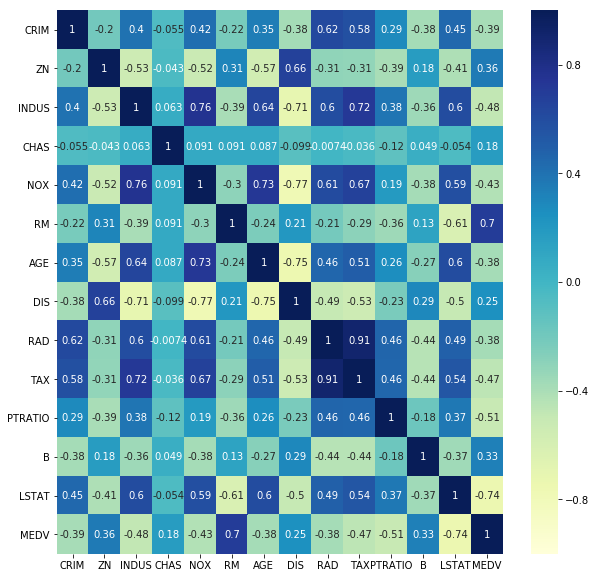

In [5]:
## Filtro

plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="YlGnBu")

In [6]:
dfx_filtro = df.loc[:, ['RM', 'PTRATIO', 'LSTAT']]
dfx_filtro.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [10]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, ytreino, yteste = train_test_split(Xn,y, test_size = 0.3, random_state = 0)
model = LinearRegression()
rfe = RFE(model,3)
X_train_rfe = rfe.fit_transform(Xtreino,ytreino)
X_test_rfe = rfe.transform(Xteste)
model.fit(X_train_rfe,ytreino)

score = model.score(X_test_rfe,yteste)
temp = pd.Series(rfe.support_,index = dfx.columns)

print("Score 3 variáveis: %f" % (score))

selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

NameError: name 'Xn' is not defined

In [8]:
## Wrapper

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

## recursive feature elimination

dfxp = dfxn.drop(['RM'], axis=1)
Xp = np.array(dfxp)

#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    Xtreino, Xteste, ytreino, yteste = train_test_split(Xp,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(Xtreino,ytreino)
    X_test_rfe = rfe.transform(Xteste)
    model.fit(X_train_rfe,ytreino)
    score = model.score(X_test_rfe,yteste)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        temp = pd.Series(rfe.support_,index = dfxp.columns)
        
print("Número ótimo de variáveis: %d" %nof)
print("Score com %d variáveis: %f" % (nof, high_score))

selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

NameError: name 'dfxn' is not defined

In [9]:
## Wrapper

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

## recursive feature elimination

#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    Xtreino, Xteste, ytreino, yteste = train_test_split(Xn,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(Xtreino,ytreino)
    X_test_rfe = rfe.transform(Xteste)
    model.fit(X_train_rfe,ytreino)
    score = model.score(X_test_rfe,yteste)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        temp = pd.Series(rfe.support_,index = dfxn.columns)
        
print("Número ótimo de variáveis: %d" %nof)
print("Score com %d variáveis: %f" % (nof, high_score))

selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

NameError: name 'Xn' is not defined

In [63]:
## Embedded

from sklearn.linear_model import LassoCV

reg = LassoCV(cv=3)
reg.fit(Xp, y)
print("Melhor alfa usando LassoCV: %f" % reg.alpha_)
print("Melhor score usando LassoCV: %f" %reg.score(Xp,y))
coef = pd.Series(reg.coef_, index = dfxp.columns)

Melhor alfa usando LassoCV: 0.031459
Melhor score usando LassoCV: 0.696261


In [64]:
coef[coef !=0]

CRIM      -0.904039
ZN         1.416590
INDUS     -0.265818
CHAS       0.741902
NOX       -2.249803
AGE        0.599359
DIS       -3.457459
RAD        3.037045
TAX       -2.121608
PTRATIO   -2.431140
B          0.587355
LSTAT     -5.504353
dtype: float64

In [65]:
print("Lasso escolheu " + str(sum(coef != 0)) + " variáveis e eliminou outras " +  str(sum(coef == 0)) + " variáveis")

Lasso escolheu 12 variáveis e eliminou outras 0 variáveis


Text(0.5, 1.0, 'Importância das variáveis usando Lasso')

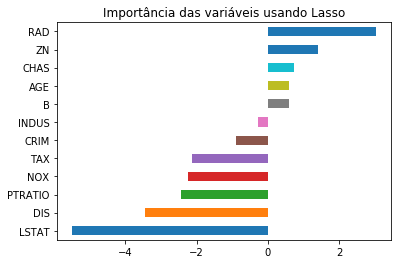

In [66]:
imp_coef = coef.sort_values()
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importância das variáveis usando Lasso")

### Padronização

Para evitar que variáveis com maior escala dominem a função custo, dado que uma variação nelas influenciariam mais o resultado, é necessário padronizar a escala de todos os *inputs* numéricos.

Isso pode ser feito subtraindo o valor mínimo e dividindo pelo intervalo de variação:

$$ x_p = \frac{x - x_{mín}}{x_{máx} - x_{mín}}$$

Ou subtraindo o valor médio e dividindo pela variância:

$$ x_n = \frac{x - \bar{x}}{s_x}$$

In [23]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

Xn = norm.fit_transform(X)

dfxn = pd.DataFrame(Xn, columns=dfx.columns)

In [24]:
dfx.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
dfxn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### Métricas

Para avaliar a qualidade do modelo, temos a nosso dispor algumas métricas. No caso de regressões, as mais comuns são:

#### Variância explicada

Como o nome diz, nos dá o quanto o modelo consegue explicar da variação que observamos nos dados:

$$ VE(y,\hat{y}) = 1-\frac{Var(y-\hat{y})}{Var(y)}$$

#### Erro médio quadrado

Média no quadrado da diferença entre real e estimado

$$ EMQ = \frac{\sum_{j=1}^{M} (y-\hat{y})^2}{M+1}$$

#### Coeficiente de determinação - $R^2$

Nos trás o quão bem amostras futuras devem ser estimadas

$$ R^2=1-\frac{\sum_{j=0}^{M} (y-\hat{y})^2}{\sum_{j=0}^{M} (y-\bar{y})^2}$$

Notamos que $R^2$ é númericamente igual à variância explicada.

#### R ajustado - $R_{adj}^2$ ou $\bar{R^2}$

O coeficiente de determinação $R^2$ tende a aumentar com a adição de variáveis, independentemente de sua relevância para o modelo. Sendo assim, ao se comparar soluções com número diferente de *inputs*, devemos usar o R ajustado, que tenta controlar esse efeito (M: número de pontos; N: número de variáveis): 

$$ \bar{R^2}=1-(1-R^2)\frac{M-1}{M-N-1}$$




In [26]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import numpy as np

def r2_aj (y_true, y_pred, shape):
    R2 = r2_score(y_true, y_pred)
    ra = 1-(1-R2)*(shape[0]-1)/(shape[0]-shape[1]-1)
    return ra
    

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ln = LinearRegression()
rd = Ridge(alpha=0.5)
ls = Lasso(alpha=0.5)

In [28]:
## Regressão Linear


ln.fit(X,y)
y_ln = ln.predict(X)

expl_ln = explained_variance_score(y, y_ln)
mse_ln = mean_squared_error(y, y_ln)
r2_ln = r2_score(y, y_ln)
r2a_ln = r2_aj(y, y_ln, np.shape(X)) 

print('exp: %f' %expl_ln)
print('mse: %f' %mse_ln)
print('r2: %f' %r2_ln)
print('r2a: %f' %r2a_ln)

exp: 0.740643
mse: 21.894831
r2: 0.740643
r2a: 0.733790


In [29]:
rd.fit(X,y)
y_rd = rd.predict(X)

expl_rd = explained_variance_score(y, y_rd)
mse_rd = mean_squared_error(y, y_rd)
r2_rd = r2_score(y, y_rd)
r2a_rd = r2_aj(y, y_rd, np.shape(X)) 

print('exp: %f' %expl_rd)
print('mse: %f' %mse_rd)
print('r2: %f' %r2_rd)
print('r2a: %f' %r2a_rd)

exp: 0.739957
mse: 21.952713
r2: 0.739957
r2a: 0.733086


In [30]:
ls.fit(X,y)
y_ls = ls.predict(X)

expl_ls = explained_variance_score(y, y_ls)
mse_ls = mean_squared_error(y, y_ls)
r2_ls = r2_score(y, y_ls)
r2a_ls = r2_aj(y, y_ls, np.shape(X)) 

print('exp: %f' %expl_ls)
print('mse: %f' %mse_ls)
print('r2: %f' %r2_ls)
print('r2a: %f' %r2a_ls)

exp: 0.714016
mse: 24.142603
r2: 0.714016
r2a: 0.706460


### Validação

Durante a decisão de escolha do modleo, é preciso ter controle da qualidade do que está sendo gerado. Se dependermos somente dos dados com que o algoritmo está treinando, corremos risco de *overfitting*, com muito erro ao se extrapolar para dados além do treino.

A solução mais simples é simular dados desconhecidos ao modelo, separando parte da base de treino, a ser usada somente na sua validação.


#### Hold-out

Método mais simples, dividem-se os dados históricos em *dataset* de treino e de validação. Apesar de se medir a qualidade do *fit* nos dados de treino, as decisões são tomadas com base na validação.

<img src=holdout.png>

#### Validação cruzada

Uma desvantagem do *hold-out* é a limitação que traz em termos de quantidade de pontos em que o modelo será treinado e validado. Se aumentarmos os pontos de treino, teremos menos pontos de validação, e vice-versa.

Como alternativa, podemos repetir a divisão treino-teste até passar por toda base de dados, efetuando a validação a cada passo. A performance geral do modelo é obtida da média da performance em cada divisão.

<img src=kfold.png>

#### Bootstrap (re-amostragem)

Com o *bootstrap*, um novo *dataset* é criado a partir de amostragens aleatórias - com reposição - dos dados que já temos.

Os dados históricos são entendidos como uma amostra da distribuição real dos dados, e o processo de *bootstrapping* procura recriar esse efeito.

<img src=bootstrap.png>


In [31]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample

In [32]:
from sklearn.utils import resample

Xr, ys = resample(X,y, n_samples = len(y), random_state=2)

In [33]:
## Hold-out

Xtreino, Xteste, ytreino, yteste = train_test_split(Xn, y, test_size=0.25, random_state=17)

ln.fit(Xtreino, ytreino)

## dados de treino
y_ln_tr = ln.predict(Xtreino)
r2_ln_tr = r2_score(ytreino, y_ln_tr)

## dados de teste
y_ln_tt = ln.predict(Xteste)
r2_ln_tt = r2_score(yteste, y_ln_tt)

print('R2 treino: %f'% r2_ln_tr)
print('R2 teste:  %f'% r2_ln_tt)

R2 treino: 0.730388
R2 teste:  0.766397


#### Ridge - Regularização $L_2$

##### Hold-out

In [101]:
score_max = 0
alfa_max = 0
score_tr = 0

intervalo = range(1,100)
int_alfa = [i/100 for i in intervalo]

Xtreino, Xteste, ytreino, yteste = train_test_split(Xp, y, test_size=0.25, random_state=17)

for a in int_alfa:
    rd = Lasso(alpha=a)
    rd.fit(Xtreino, ytreino)
    y_pred = rd.predict(Xteste)
    
    r2 = r2_score(yteste, y_pred)
    
    y_tr = rd.predict(Xtreino)
    r2tr = r2_score(ytreino, y_tr)
    if r2 > score_max:
        score_max = r2
        alfa_max = a
        score_tr = r2tr
    
print('Alfa ótimo: %.4f' % alfa_max)
print('R2 ótimo:   %f' % score_max)
print('R2 treino:  %f' % score_tr)

Alfa ótimo: 0.0100
R2 ótimo:   0.704004
R2 treino:  0.690831


##### Validação cruzada

In [99]:
kf = KFold(3)

score_max = 0
alfa_max = 0
score_tr = 0

intervalo = range(1,100)
int_alfa = [i/100 for i in intervalo]


for a in int_alfa:
    rd = Lasso(alpha=a)
    
    score_teste = []
    score_treino = []
    
    for ind_treino, ind_teste in kf.split(Xp):
        Xtreino, Xteste = Xp[ind_treino], Xp[ind_teste]
        ytreino, yteste = y[ind_treino], y[ind_teste]
        rd.fit(Xtreino, ytreino)
        y_pred = rd.predict(Xteste)
    
        r2_ = r2_score(yteste, y_pred)
    
        y_tr = rd.predict(Xtreino)
        r2tr_ = r2_score(ytreino, y_tr)
        
        score_teste.append(r2_)
        score_treino.append(r2tr_)
    r2 = np.mean(score_teste)
    r2tr = np.mean(score_treino)
    
    if r2 > score_max:
        score_max = r2
        alfa_max = a
        score_tr = r2tr
    
print('Alfa ótimo: %.4f' % alfa_max)
print('R2 ótimo:   %f' % score_max)
print('R2 treino:  %f' % score_tr)
    
    


Alfa ótimo: 0.0300
R2 ótimo:   0.494187
R2 treino:  0.678655


In [118]:
## Bootstrap
from sklearn.utils import resample

score_max = 0
alfa_max = 0
score_tr = 0

intervalo = range(1,100)
int_alfa = [i/100 for i in intervalo]

Xtreino, Xteste, ytreino, yteste = train_test_split(Xp, y, test_size=0.25, random_state=17)

k = range(0,3)

for a in int_alfa:
    rd = Lasso(alpha=a)
    
    score_teste = []
    score_treino = []
    
    for i in k:
        Xtreino_r, ytreino_r = resample(Xtreino, ytreino, random_state=i)
        Xteste_r, yteste_r = resample(Xteste, yteste, random_state=i)
        rd.fit(Xtreino_r, ytreino_r)
        y_pred = rd.predict(Xteste_r)
    
        r2_ = r2_score(yteste_r, y_pred)
    
        y_tr = rd.predict(Xtreino_r)
        r2tr_ = r2_score(ytreino_r, y_tr)
        
        score_teste.append(r2_)
        score_treino.append(r2tr_)
        
    r2 = np.mean(score_teste)
    r2tr = np.mean(score_treino)
    
    if r2 > score_max:
        score_max = r2
        alfa_max = a
        score_tr = r2tr
    
print('Alfa ótimo: %.4f' % alfa_max)
print('R2 ótimo:   %f' % score_max)
print('R2 treino:  %f' % score_tr)



Alfa ótimo: 0.0100
R2 ótimo:   0.663533
R2 treino:  0.703420


In [114]:
score_treino

[-0.33866422116101913, -0.46239106665701657, -0.4385377381537201]

In [115]:
score_teste

[0.49239994173676116, 0.5437579883491999, 0.6240100183968051]